# EDA IBM stock 1min ticks



In [1]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [2]:
from modeling.createTrainingDataSet import createTrainingDataSet
from modeling.StockModel import generatePipeline

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [4]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday/IBM_adjusted.txt', header=None, names=names, nrows=2000)
df['DateTime']= pd.to_datetime((df.Date+' '+df.Time),infer_datetime_format=True) 
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('DateTime')


In [5]:
df.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
1998-01-02 09:30:00,33.69,33.69,33.69,33.69,207820
1998-01-02 09:31:00,33.65,33.69,33.65,33.65,33499
1998-01-02 09:32:00,33.67,33.69,33.65,33.69,41254
1998-01-02 09:33:00,33.67,33.69,33.65,33.65,52110
1998-01-02 09:34:00,33.65,33.69,33.65,33.65,14892


In [6]:
df = df[-10000:]

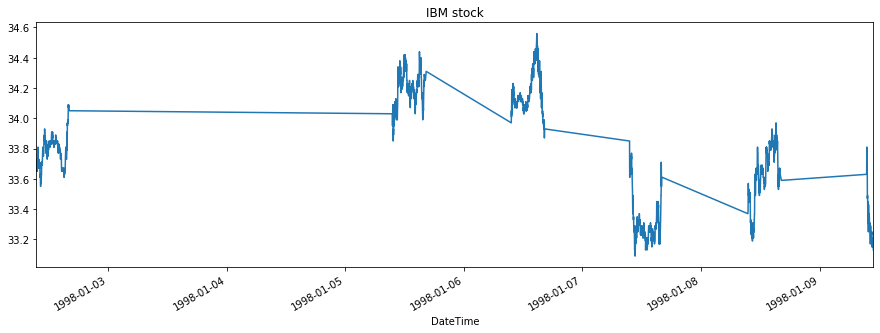

In [7]:
#df.head()
df.Open.plot(figsize=(15,5), title='IBM stock');
#df.index.map(lambda x: x.year).value_counts().sort_index().plot.bar(figsize=(15, 5), title='ticks per year');
#df.Open.diff().plot.hist(bins=200, figsize=(15,5), title= 'distribution of the differential');
#pd.Series(df.index.map(lambda x: x.day)).value_counts().sort_index().plot.bar()

In [8]:
dg  = createTrainingDataSet(df, presentStart=1, pastStart=5, futureEnd=-30)

In [9]:
dg.target.value_counts()

False    476
True     436
Name: target, dtype: int64

In [10]:
X = dg.copy()
y = X.pop('target')

In [11]:
X.shape

(912, 6)

In [12]:
X.head()

,DateTime,Open,High,Low,Close,Volume
DateTime,,,,,,
1998-01-02 09:35:00,"[1998-01-02 09:30:00, 1998-01-02 09:31:00, 199...","[33.69, 33.65, 33.67, 33.67, 33.65, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.69]","[33.69, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.69, 33.65, 33.65, 33.65]","[207820.0, 33499.0, 41254.0, 52110.0, 14892.0,..."
1998-01-02 09:36:00,"[1998-01-02 09:31:00, 1998-01-02 09:32:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.67, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.69, 33.65, 33.65, 33.65, 33.67]","[33499.0, 41254.0, 52110.0, 14892.0, 72272.0, ..."
1998-01-02 09:37:00,"[1998-01-02 09:32:00, 1998-01-02 09:33:00, 199...","[33.67, 33.67, 33.65, 33.67, 33.67, 33.65]","[33.69, 33.69, 33.69, 33.69, 33.67, 33.65]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.65, 33.65, 33.67, 33.65]","[41254.0, 52110.0, 14892.0, 72272.0, 8065.0, 8..."
1998-01-02 09:38:00,"[1998-01-02 09:33:00, 1998-01-02 09:34:00, 199...","[33.67, 33.65, 33.67, 33.67, 33.65, 33.65]","[33.69, 33.69, 33.69, 33.67, 33.65, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.65, 33.67, 33.65, 33.67]","[52110.0, 14892.0, 72272.0, 8065.0, 8685.0, 34..."
1998-01-02 09:39:00,"[1998-01-02 09:34:00, 1998-01-02 09:35:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.65, 33.65]","[33.69, 33.69, 33.67, 33.65, 33.67, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.67, 33.65, 33.67, 33.67]","[14892.0, 72272.0, 8065.0, 8685.0, 34433.0, 77..."


# Debugging the pipeline

In [13]:
X

,DateTime,Open,High,Low,Close,Volume
DateTime,,,,,,
1998-01-02 09:35:00,"[1998-01-02 09:30:00, 1998-01-02 09:31:00, 199...","[33.69, 33.65, 33.67, 33.67, 33.65, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.69]","[33.69, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.69, 33.65, 33.65, 33.65]","[207820.0, 33499.0, 41254.0, 52110.0, 14892.0,..."
1998-01-02 09:36:00,"[1998-01-02 09:31:00, 1998-01-02 09:32:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.67, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.69, 33.65, 33.65, 33.65, 33.67]","[33499.0, 41254.0, 52110.0, 14892.0, 72272.0, ..."
1998-01-02 09:37:00,"[1998-01-02 09:32:00, 1998-01-02 09:33:00, 199...","[33.67, 33.67, 33.65, 33.67, 33.67, 33.65]","[33.69, 33.69, 33.69, 33.69, 33.67, 33.65]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.65, 33.65, 33.67, 33.65]","[41254.0, 52110.0, 14892.0, 72272.0, 8065.0, 8..."
1998-01-02 09:38:00,"[1998-01-02 09:33:00, 1998-01-02 09:34:00, 199...","[33.67, 33.65, 33.67, 33.67, 33.65, 33.65]","[33.69, 33.69, 33.69, 33.67, 33.65, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.65, 33.67, 33.65, 33.67]","[52110.0, 14892.0, 72272.0, 8065.0, 8685.0, 34..."
1998-01-02 09:39:00,"[1998-01-02 09:34:00, 1998-01-02 09:35:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.65, 33.65]","[33.69, 33.69, 33.67, 33.65, 33.67, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.67, 33.65, 33.67, 33.67]","[14892.0, 72272.0, 8065.0, 8685.0, 34433.0, 77..."
...,...,...,...,...,...,...
1998-01-09 10:20:00,"[1998-01-09 10:15:00, 1998-01-09 10:16:00, 199...","[33.23, 33.21, 33.17, 33.21, 33.23, 33.29]","[33.23, 33.25, 33.23, 33.23, 33.29, 33.29]","[33.21, 33.21, 33.17, 33.19, 33.23, 33.25]","[33.21, 33.21, 33.21, 33.21, 33.29, 33.25]","[49008.0, 35671.0, 6833.0, 58934.0, 96156.0, 6..."
1998-01-09 10:21:00,"[1998-01-09 10:16:00, 1998-01-09 10:17:00, 199...","[33.21, 33.17, 33.21, 33.23, 33.29, 33.27]","[33.25, 33.23, 33.23, 33.29, 33.29, 33.27]","[33.21, 33.17, 33.19, 33.23, 33.25, 33.21]","[33.21, 33.21, 33.21, 33.29, 33.25, 33.21]","[35671.0, 6833.0, 58934.0, 96156.0, 60485.0, 4..."
1998-01-09 10:22:00,"[1998-01-09 10:17:00, 1998-01-09 10:18:00, 199...","[33.17, 33.21, 33.23, 33.29, 33.27, 33.21]","[33.23, 33.23, 33.29, 33.29, 33.27, 33.25]","[33.17, 33.19, 33.23, 33.25, 33.21, 33.21]","[33.21, 33.21, 33.29, 33.25, 33.21, 33.25]","[6833.0, 58934.0, 96156.0, 60485.0, 49008.0, 3..."


In [14]:
pipeline = generatePipeline()

In [16]:
pipeline.fit_transform(X).head()

,Open_max,Open_argmax,Open_min,Open_argmin,Open_mean,Open_std,Open_median,Open_last,High_max,High_argmax,...,Volume_max,Volume_argmax,Volume_min,Volume_argmin,Volume_mean,Volume_std,Volume_median,Volume_last,hour,tenminute
DateTime,,,,,,,,,,,,,,,,,,,,,
1998-01-02 09:35:00,1.000594,0.0,0.999406,1.0,0.999901,0.000408,1.000000,1.0,1.000000,0.0,...,2.875526,0.0,0.206055,4.0,0.972823,0.884436,0.645921,1.0,9.0,3.0
1998-01-02 09:36:00,1.000000,1.0,0.999406,0.0,0.999802,0.000280,1.000000,1.0,1.000594,0.0,...,8.961190,4.0,1.000000,5.0,4.589626,2.692274,4.634408,1.0,9.0,3.0
1998-01-02 09:37:00,1.000594,0.0,1.000000,2.0,1.000396,0.000280,1.000594,1.0,1.001189,0.0,...,8.321474,3.0,0.928613,4.0,3.785799,2.787427,3.232355,1.0,9.0,3.0
1998-01-02 09:38:00,1.000594,0.0,1.000000,1.0,1.000297,0.000297,1.000297,1.0,1.000594,0.0,...,2.098917,2.0,0.234223,3.0,0.921872,0.695484,0.716246,1.0,9.0,3.0
1998-01-02 09:39:00,1.000594,1.0,1.000000,0.0,1.000198,0.000280,1.000000,1.0,1.000594,0.0,...,9.320609,1.0,1.000000,5.0,3.140336,3.012419,1.520312,1.0,9.0,3.0


## MIGHT BE USEFUL?. A precision recall-curve with only one training split.

In [ ]:
# temporal split of train/test
trainPercentage = 50
testBegins = (len(X)*trainPercentage)//100
Xtrain, ytrain = X[:testBegins], y[:testBegins]
Xtest, ytest = X[testBegins:], y[testBegins:]

In [ ]:
model = generatePipeline()
model.fit(Xtrain, ytrain)

In [ ]:
# how to pick a threshold? classic Luis!
ypredictedTrain=list(model.predict_proba(Xtrain)[:,1])

In [ ]:
ypredictedTrain.sort(reverse=True)

In [ ]:
threshold = ypredictedTrain[100]

In [ ]:
threshold

In [ ]:
# ploting precision-recall !
base_rate = sum(ytest)/len(ytest)
ypredicted=model.predict_proba(Xtest)[:,1]
average_precision = average_precision_score(ytest, ypredicted)
disp = plot_precision_recall_curve(model, Xtest, ytest)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([0, 1], [base_rate, base_rate]);

In [ ]:
evaluationDF = pd.DataFrame({'predicted':ypredicted, 'target':ytest, 'unthresholdedTarget':Xtest.unthresholdedTarget}, index=Xtest.index)
#topPredictions = evaluationDF.sort_values(by='predicted', ascending=False)[:100]

In [ ]:
evaluationDF['thresholdedPrediction']=evaluationDF.predicted>threshold

In [ ]:
topPredictions=evaluationDF[evaluationDF.thresholdedPrediction==True]

In [ ]:
topPredictions

In [ ]:
evaluationDF.unthresholdedTarget.plot.hist()

In [ ]:
topPredictions.unthresholdedTarget.plot.hist()

In [ ]:
print(evaluationDF.unthresholdedTarget.mean())
print(topPredictions.unthresholdedTarget.mean())

In [ ]:
print(evaluationDF.unthresholdedTarget.median())
print(topPredictions.unthresholdedTarget.median())

In [ ]:
topPredictions.shape

In [ ]:
topPredictions.predicted.sort_index().plot()

In [ ]:
## now lets do the same but predict when performance is going to be below median
ytrain_neg = ~(ytrain)
ytest_neg = ~(ytest)
model = generatePipeline()
model.fit(Xtrain, ytrain_neg)

In [ ]:
base_rate = sum(ytest_neg)/len(ytest_neg)
ypredicted_neg=model.predict_proba(Xtest)[:,1]
average_precision = average_precision_score(ytest_neg, ypredicted_neg)
disp = plot_precision_recall_curve(model, Xtest, ytest_neg)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([0, 1], [base_rate, base_rate]);